#               Car accident severity

## Introduction

The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.

In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.

The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import concurrent.futures
import multiprocessing
num_processes = multiprocessing.cpu_count()
global_starttime = time.time()
from tqdm.auto import tqdm, trange
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

## Data Acquistion


The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present. The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 3.

A code that corresponds to the severity of the collision: 

• 3—fatality 

• 2b—serious injury

• 2—injury 

• 1—prop damage

• 0—unknown

To accurately build a model to prevent future accidents and/or reduce their severity, we will use the following attributes — ADDRTYPE, WEATHER, ROADCOND, VEHCOUNT, PERSONCOUNT.


#### Load Data From CSV File

In [2]:
data_df = pd.read_csv("Data-Collisions.csv")

C:\Users\JAY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data_df.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [5]:
data_df.shape

(194673, 38)

In [6]:
data_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
data_df.loc[0,:]

SEVERITYCODE                                                      2
X                                                          -122.323
Y                                                           47.7031
OBJECTID                                                          1
INCKEY                                                         1307
COLDETKEY                                                      1307
REPORTNO                                                    3502005
STATUS                                                      Matched
ADDRTYPE                                               Intersection
INTKEY                                                        37475
LOCATION                                 5TH AVE NE AND NE 103RD ST
EXCEPTRSNCODE                                                      
EXCEPTRSNDESC                                                   NaN
SEVERITYCODE.1                                                    2
SEVERITYDESC                                    

In [9]:
data_df.isnull().sum(axis=0)

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

# Data Cleaning

The data obtained from the Seattle Open Data website are not, in their original form, usable for the purposes of model building. There are a number of issues which must be addressed:

1. **Columns containing useless/redundant data. These columns can be removed from the dataframe and include**:
    * _OBJECTID_ - this is just an database key, but Pandas creates its own key on import.
    * _COLDETKEY_ - this is just a duplicate of INCKEY, and probably arises due to a cross-matching of tables on the Seattle Open Data website. We will keep INCKEY as a unique identifier for each accident, but do not need to keep the duplicate column
    * _REPORTNO_ - this is just another identifier for the accident, this time tying the record to the individual piece of paperwork that was filed to report the accident. This is not useful for building our model.
    * _STATUS_ - the meaning of this column is unclear (and is not explained in the Attribute Information metadata). The values are either "Matched" or "Unmatched".
    * _EXCEPTRSNCODE, EXCEPTRSNDESC_ - these columns are listed in the Attribute Information metadata, but their meanings are not explained. EXCEPTRSNCODE is blank/NaN in ~99% of the data, with 2,480 accidents having a non-blank entry, all of which are the same ("NEI"). According to EXCEPTRSNDESC this means "Not Enough Information".
    * _INCDATE_ - this column is just a duplicate of the more easily parsable INCDTTM
    * _SDOTCOLNUM_ - this is another unique identifier for each accident, however as we are planning to keep INCKEY, keeping this second unique identifier is redundant.
    
2. **Rows which are missing information about some of the features which we expect will be key to building the model:** as we can see from df.head, a number of accidents (accounting for ~15% of the dataset) have "Unknown" values for attributes like _WEATHER_ , _ROADCOND_ and _LIGHTCOND_ , or have these fields blank/NaN, which in practice means the same thing. As these are expected to be among the features which influence the likelihood and severity of accidents, we have to consider discarding these rows before training the model.

3. **Presence of features with categorical values:** In order to construct a model using Machine Learning techniques, we must take columns which contain categorical data and re-cast them in numeric form. Different techniques will be used to accomplish this, depending on the nature of the data in these columns.
    * Some columns, such as _UNDERINFL_ and _HITPARKEDCAR_ contain a mixture of alphanumeric (Y/N or 1/0), boolean (True/False) and missing (NaN) data. To prepare the data for modelling it will be important to homogenise these data by treating 1, Y and True as equivalent (and setting these to 1) and treating 0, N and False as equivalent (setting these to 0). Furthermore, we can infer that missing values (represented with NaN) are equivalent to 0/False.
    * Other columns contain labelled data (e.g. _WEATHERCOND_ , which takes one of a handful of values such as _RAIN_ , _CLEAR_ , _SNOWING_ , etc). These can be prepared for modelling by using One-Hot Encoding, wherein a new column is created for each of the discrete values corresponding to the original variable/column, which is filled with 1s or 0s depending on the value in that column.
    
4. **Incorporating timestamp information:** The _INCDTTM_ column contains the incident date/time in alphanumeric form. This can be parsed to an actual timestamp using Pandas, and then separated in to separate columns for Hour, Day (of month) Day (of week), Month and Year to study temporal trends
    
5. **Other issues:** after performing the above data engineering issues, we will create a copy of the data frame (minus any columns which will not be used for model-building) and perform a final check for any remaining NaNs/missing data. We will decide how to handle these later.
    
    
Okay, let's get started!



### Data Cleaning 1: Removing unnecessary columns

In [10]:
#Begin by checking whether these columns exists in the dataset and if so, delete them:
if 'OBJECTID' in data_df:
    del data_df["OBJECTID"]
if 'COLDETKEY' in data_df:
    del data_df["COLDETKEY"]
if 'REPORTNO' in data_df:
    del data_df["REPORTNO"]
if 'STATUS' in data_df:
    del data_df["STATUS"]
if 'EXCEPTRSNCODE' in data_df:
    del data_df["EXCEPTRSNCODE"]
if 'EXCEPTRSNDESC' in data_df:
    del data_df["EXCEPTRSNDESC"]
if 'INCDATE' in data_df:
    del data_df["INCDATE"]
if 'SDOTCOLNUM' in data_df:
    del data_df["SDOTCOLNUM"]
if 'STCOLCODE' in data_df:
    del data_df["STCOLCODE"]

In [11]:
data_df.head()

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,...,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,...,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N


### Data Cleaning 3: Removing rows where key features are missing

In [12]:
#Find missing WEATHERCOND
todrop1 = data_df["WEATHER"] == 'Unknown'
noweatherinfo = todrop1.values.sum()

#Find missing ROADCOND
todrop2 = data_df["ROADCOND"] == "Unknown"
noroadcondinfo = todrop2.values.sum()

#Find missing LIGHTCOND
todrop3 = data_df["LIGHTCOND"] == "Unknown"
nolightinfo = todrop3.values.sum()

In [13]:
#Collate these and remove
data_df["TODROP"] = 0
count_noweather = 0
count_noinfo = 0
for i in range(0,len(todrop1)):
    if todrop1[i] == True or todrop2[i] == True or todrop3[i] == True:
        data_df["TODROP"][i] = 1
        
print("There are "+str(noweatherinfo)+" accidents with no weather information.")
print("There are "+str(noroadcondinfo)+" accidents with no road condition information.")
print("There are "+str(nolightinfo)+" accidents with no information about light conditions.")
print("There are "+str(data_df["TODROP"].values.sum())+" accidents without one or more of the above.\n Deleting now...")

C:\Users\JAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


There are 15091 accidents with no weather information.
There are 15078 accidents with no road condition information.
There are 13473 accidents with no information about light conditions.
There are 18902 accidents without one or more of the above.
 Deleting now...


In [14]:
#Delete the temporary column "TODROP" and re-index the data
shape0 = data_df.shape
todrop = data_df["TODROP"] == 1
data_df.drop(data_df.index[todrop], inplace=True)

In [15]:
#Print info about DF shape before and after
print("Shape of DF before: "+str(shape0[0])+" x "+str(shape0[1]))
print("Shape of DF after: "+str(data_df.shape[0])+" x "+str(data_df.shape[1]))

Shape of DF before: 194673 x 31
Shape of DF after: 175771 x 31


In [16]:
#Re-index dataframe to account for missing rows
data_df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in data_df:
    del data_df["TODROP"]
    
    del data_df["index"]

## Data Cleaning 4: Dealing with categorical variables

In [17]:
#Take columns with mixed boolean data types ([1, "Y", True],[0, "N", False] etc) and cast them as numerical variables
#SPEEDING, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, HITPARKEDCAR
data_df["SPEEDING"].replace(np.nan, 0, inplace=True)
data_df["SPEEDING"].replace("Y", 1, inplace=True)

data_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
data_df["INATTENTIONIND"].replace("Y", 1, inplace=True)

data_df["UNDERINFL"].replace(np.nan, 0, inplace=True)
data_df["UNDERINFL"].replace('N', 0, inplace=True)
data_df["UNDERINFL"].replace('0', 0, inplace=True)
data_df["UNDERINFL"].replace('1', 1, inplace=True)
data_df["UNDERINFL"].replace("Y", 1, inplace=True)

data_df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
data_df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

data_df["HITPARKEDCAR"].replace("N", 0, inplace=True)
data_df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
data_df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [18]:
data_df["WEATHER"].value_counts()

Clear                       109086
Raining                      32763
Overcast                     27008
Snowing                        837
Fog/Smog/Smoke                 555
Other                          266
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               48
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [19]:
data_df["ROADCOND"].value_counts()

Dry               121957
Wet                46523
Ice                 1099
Snow/Slush           850
Other                111
Standing Water       108
Sand/Mud/Dirt         67
Oil                   61
Name: ROADCOND, dtype: int64

In [20]:
data_df["LIGHTCOND"].value_counts()

Daylight                    112891
Dark - Street Lights On      46910
Dusk                          5675
Dawn                          2424
Dark - No Street Lights       1416
Dark - Street Lights Off      1124
Other                          201
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [21]:
data_df["ADDRTYPE"].value_counts()

Block           111321
Intersection     63008
Alley              603
Name: ADDRTYPE, dtype: int64

In [22]:
#Use One Hot Encoding to deal with categorical data
#Get dummies for one-hot encoding
weatherdummies = pd.get_dummies(data_df["WEATHER"])
lightconddummies = pd.get_dummies(data_df["LIGHTCOND"])
roadconddummies = pd.get_dummies(data_df["ROADCOND"])
addrtypedummies = pd.get_dummies(data_df["ADDRTYPE"])

#There is an "other" column in each of the above DFs -- rename these to avoid confusion
#when the DataFrames are merged
weatherdummies.rename(columns={"Other": "Other weather"}, inplace=True)
lightconddummies.rename(columns={"Other": "Other light"}, inplace=True)
roadconddummies.rename(columns={"Other": "Other roadcond"}, inplace=True)

#Now use one-hot encoding on SDOT_COLCODE
colcodedummies = pd.get_dummies(data_df["SDOT_COLCODE"])
columns = colcodedummies.columns
for col in columns:
    colcodedummies = colcodedummies.rename(columns={col: 'SDOT_COLCODE_'+str(col)})

#Join columns to existing DataFrame
#data_frames = [df, weatherdummies, lightconddummies, roadconddummies, addrtypedummies]
data_df = data_df.join(weatherdummies)
data_df = data_df.join(lightconddummies)
data_df = data_df.join(roadconddummies)
data_df = data_df.join(addrtypedummies)
data_df = data_df.join(colcodedummies)

In [23]:
print(colcodedummies.shape)
colcodedummies.head(5)

(175771, 39)


,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,...,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Cleaning 5: Incorporating date/time as timestamps

In [24]:
#Separate Date/Time from INCDTTM colum and create columns for Hour/Minute, Day/Month/Year
data_df["INC_DATE_TIME"] = pd.to_datetime(data_df["INCDTTM"])
data_df["MONTH"] = pd.DatetimeIndex(data_df["INC_DATE_TIME"]).month
data_df["DAY_OF_WEEK"] = data_df["INC_DATE_TIME"].dt.dayofweek
data_df["DAY_OF_MONTH"] = pd.DatetimeIndex(data_df["INC_DATE_TIME"]).day
data_df["YEAR"] = pd.DatetimeIndex(data_df["INC_DATE_TIME"]).year

#Find the nearest whole hour to the time the collision occurred, e.g. 14:25 -> 14:00 and 14:35 -> 15:00
from datetime import datetime, timedelta

#Create new columns
data_df["TIME_ROUNDED_TO_NEAREST_HOUR"] = 0
data_df["DAY_STRING"] = 0
data_df["MONTH_STRING"] = 0
data_df["WEEKEND"] = 0

#Define some useful functions
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

def get_dow(day_int):
    if day_int == 1:
        dow = 'Mon'
    if day_int == 2:
        dow = 'Tue'
    if day_int == 3:
        dow = 'Wed'
    if day_int == 4:
        dow = 'Thu'
    if day_int == 5:
        dow = 'Fri'
    if day_int == 6:
        dow = 'Sat'
    if day_int == 7:
        dow = 'Sun'
    return dow

def get_month(month_int):
    if month_int == 1:
        monthstring = 'Jan'
    if month_int == 2:
        monthstring = 'Feb'
    if month_int == 3:
        monthstring = 'Mar'
    if month_int == 4:
        monthstring = 'Apr'
    if month_int == 5:
        monthstring = 'May'
    if month_int == 6:
        monthstring = 'Jun'
    if month_int == 7:
        monthstring = 'Jul'
    if month_int == 8:
        monthstring = 'Aug'
    if month_int == 9:
        monthstring = 'Sep'
    if month_int == 10:
        monthstring = 'Oct'
    if month_int == 11:
        monthstring = 'Nov'
    if month_int == 12:
        monthstring = 'Dec'
    return monthstring
     
def is_weekend(day_int):
    if day_int <= 4:
        isweekend = 0
    else:
        isweekend = 1
    return isweekend

start_time = time.time()

In [25]:
#Now store the nearest hour to the time of the accident as an integer and delete the rounded Datetime
data_df["HOUR_NEAREST"] = pd.DatetimeIndex(data_df["TIME_ROUNDED_TO_NEAREST_HOUR"]).hour
del data_df["TIME_ROUNDED_TO_NEAREST_HOUR"]

In [26]:
#Check the result of this
data_df.head(5)

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,DAY_STRING,MONTH_STRING,WEEKEND,HOUR_NEAREST
0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,...,0,2013-03-27 14:54:00,3,2,27,2013,0,0,0,0
1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,...,0,2006-12-20 18:55:00,12,2,20,2006,0,0,0,0
2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,...,0,2004-11-18 10:20:00,11,3,18,2004,0,0,0,0
3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,...,0,2013-03-29 09:26:00,3,4,29,2013,0,0,0,0
4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,...,0,2004-01-28 08:04:00,1,2,28,2004,0,0,0,0


## Data Cleaning 6: Other issues

There are 16 accidents with no data for _ST\_COLCODE_ , meaning we do not have a clear description of exactly what kind of accident occurred. This is a tiny fraction of the data, and it would be useful to include this feature in modelling. Rather than try to fudge the model by populating these missing values with the modal value for _ST\_COLCODE_ we will simply get rid of these rows from the dataframe.

Of more pressing concern, there are a large number of accidents with no Latitude/Longitude information. Let's explore these in more detail.

In [27]:
#Check the dataframe for any NaNs
print(data_df.isnull().sum(axis=0))

SEVERITYCODE       0
X               3964
Y               3964
INCKEY             0
ADDRTYPE         839
                ... 
YEAR               0
DAY_STRING         0
MONTH_STRING       0
WEEKEND            0
HOUR_NEAREST       0
Length: 107, dtype: int64


In [28]:
#ST_COLCODE
#Find NaNs and set these to spaces.
print("How many are null: "+str(data_df["ST_COLCODE"].isnull().sum()))
print("Try to populate these with -999")
data_df["ST_COLCODE"].fillna(' ', inplace=True)
print("How many are null: "+str(data_df["ST_COLCODE"].isnull().sum()))

#Get rid of accidents with no ST_COLCODE (null and/or former NaNs)
todrop = data_df["ST_COLCODE"] == ' '

#Collate these and remove
data_df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        data_df["TODROP"][i] = 1
        
print("There are "+str(data_df["TODROP"].values.sum())+" accidents without an ST_COLCODE.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
todrop = data_df["TODROP"] == 1
data_df.drop(data_df.index[todrop], inplace=True)

#Re-index dataframe to account for missing rows
data_df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in data_df:
    del data_df["TODROP"]
    del data_df["index"]

#Cast from type 'object' to type 'int'
data_df = data_df.astype({'ST_COLCODE':np.int64})
    
print("Dataframe shape now:")
data_df.shape

How many are null: 16
Try to populate these with -999
How many are null: 0


C:\Users\JAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


There are 4900 accidents without an ST_COLCODE.
 Deleting now...
Dataframe shape now:


(170871, 107)

In [29]:
#Missing geographical data
#Find null values and replace these with NaN
#Find NaNs and set these to spaces.
print("There are "+str(data_df["X"].isnull().sum())+" null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.")

#Go through the accidents with no X,Y data and see if we can match them to others
#that share the same INTKEY
data_df["NOT_HAS_COORDS"] = data_df["X"].isnull()
count = 0
for i in range(0,len(data_df["X"])):
    if data_df["NOT_HAS_COORDS"][i] == True:
        if data_df["INTKEY"][i] > 0:
            #Find other accidents which share the same INTKEY
            matched_intersections = data_df.loc[data_df["INTKEY"] == data_df["INTKEY"][i]]
            #Do any of these have the required X,Y data?
            with_geodata = matched_intersections["X"].count()
            if with_geodata > 0:
                matched_intersections.head()
                count += 1

if "NOT_HAS_COORDS" in data_df:
    del data_df["NOT_HAS_COORDS"]
    
print("Added locations for "+str(count)+" accidents based on shared INTKEYS.")

There are 3817 null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.
Added locations for 0 accidents based on shared INTKEYS.


In [30]:
#Remove accidents from the database which still have no location information
#X, Y
#Find NaNs and set these to spaces.
print("There are "+str(data_df["X"].isnull().sum())+" accidents with no location information")
print("Populate these with -999 and then delete")
data_df["X"].fillna(-999, inplace=True)
print("There are now "+str(data_df["ST_COLCODE"].isnull().sum())+" with NaN/null locations.")
print("I will now delete these...")

#Get rid of accidents with no ST_COLCODE (null and/or former NaNs)
todrop = data_df["X"] == -999

#Collate these and remove
data_df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        data_df["TODROP"][i] = 1
        
print("There are "+str(data_df["TODROP"].values.sum())+" accidents without an location.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
todrop = data_df["TODROP"] == 1
data_df.drop(data_df.index[todrop], inplace=True)

#Re-index dataframe to account for missing rows
data_df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in data_df:
    del data_df["TODROP"]
    del data_df["index"]

print("Dataframe shape now:")
data_df.shape

There are 3817 accidents with no location information
Populate these with -999 and then delete
There are now 0 with NaN/null locations.
I will now delete these...


C:\Users\JAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


There are 3817 accidents without an location.
 Deleting now...
Dataframe shape now:


(167054, 107)

## Data Cleaning: Final remarks

We have spent a lot of time and effort so far cleaning the dataframe "df". This has included dropping uninformative columns, dropping rows which are missing one or more pieces of key information and casting categorical data in to numerical forms (integets/floats) that are suitable for machine learning algorithms to get their teeth into. 

There are still some columns which we have kept so far as they have been informative up until now (e.g. _SDOT\_COLDESC_ , which provides a description of the meaning of _SDOT\_COLCODE_ ) but these too will have to be excluded from the dataframe before model-building can begin. Rather than drop these columns from the dataframe "df" we will instead create a new dataframe called "data", and simply drop the unnecessary columns from there. 

In this manner it will be trivial to re-copy them back from "df" later if required.

In [31]:
#Keep the full dataframe, but create a copy which drops columns which will not be used for modelling
data = data_df.copy()
if 'INCKEY' in data_df:
    del data["INCKEY"]
    del data["INTKEY"]
    del data["ADDRTYPE"]
    del data["LOCATION"]
    del data["SEVERITYDESC"]
    del data["COLLISIONTYPE"]
    del data["INCDTTM"]
    del data["JUNCTIONTYPE"]
    del data["SDOT_COLDESC"]

This is the dataframe that will be used for model building. Let's take a look at it in more detail, shall we?

In [32]:
print("The shape of the dataframe is:")
print(data.shape)

The shape of the dataframe is:
(167054, 98)


In [33]:
print("The data types are:")
data.dtypes

The data types are:


SEVERITYCODE        int64
X                 float64
Y                 float64
SEVERITYCODE.1      int64
PERSONCOUNT         int64
                   ...   
YEAR                int64
DAY_STRING          int64
MONTH_STRING        int64
WEEKEND             int64
HOUR_NEAREST        int64
Length: 98, dtype: object

In [34]:
print("Here is a count of how many null/NaN values there are in each column:")
print(data.isnull().sum(axis=0))

Here is a count of how many null/NaN values there are in each column:
SEVERITYCODE      0
X                 0
Y                 0
SEVERITYCODE.1    0
PERSONCOUNT       0
                 ..
YEAR              0
DAY_STRING        0
MONTH_STRING      0
WEEKEND           0
HOUR_NEAREST      0
Length: 98, dtype: int64


## Data Exploration 1: Where do accidents occur?

The Seattle Open Data portal record of traffic accidents include the latitude and longitude (as X, Y, respectively) of every accident that occurred in the city council area. Let's create a map in Folium to see where these occur. This might highlight some key "choke points" in the city road network and give context for some of the predictions that eventually come out of the model.

In [177]:
import folium

#Get the median latitude and logitude and centre the map there
lon_med = data["X"].mean()
lat_med = data["Y"].mean()

print(lat_med)
print(lon_med)

seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map

47.61892976281737
-122.33034570685248


## Data exploration 2 -- histograms

In [36]:
from collections import Counter

#Set up gpplot style
plt.style.use('ggplot')


In [37]:
#A reminder of what columns are in the dataset:
data_df.head(5)

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,DAY_STRING,MONTH_STRING,WEEKEND,HOUR_NEAREST
0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,...,0,2013-03-27 14:54:00,3,2,27,2013,0,0,0,0
1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,...,0,2006-12-20 18:55:00,12,2,20,2006,0,0,0,0
2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,...,0,2004-11-18 10:20:00,11,3,18,2004,0,0,0,0
3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,...,0,2013-03-29 09:26:00,3,4,29,2013,0,0,0,0
4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,...,0,2004-01-28 08:04:00,1,2,28,2004,0,0,0,0


In [38]:
data_df["ADDRTYPE"].value_counts()

Block           105870
Intersection     61184
Name: ADDRTYPE, dtype: int64

There are 167054 entries in df currently.


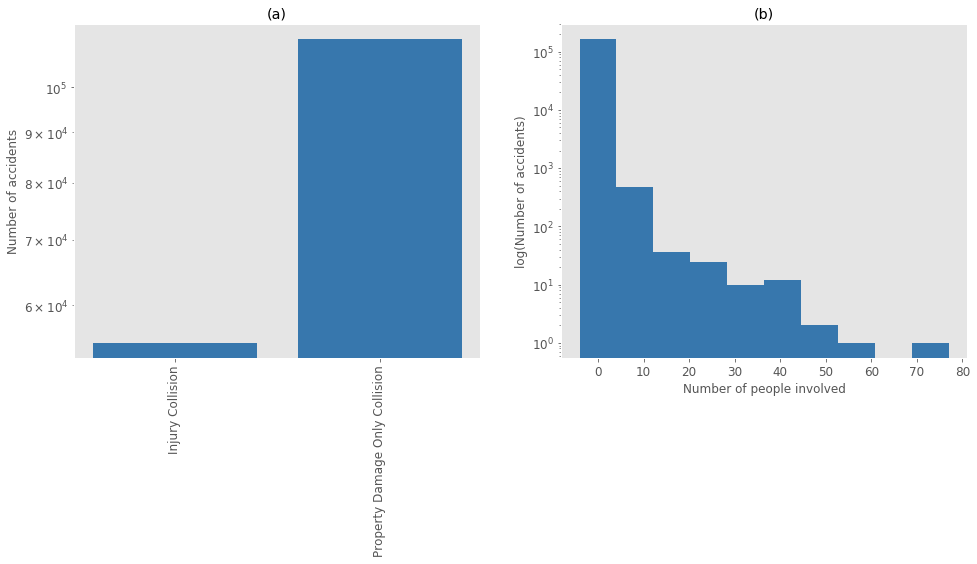

In [93]:
print("There are "+str(len(data_df))+" entries in df currently.")

#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Accident severities
plt.subplot(2,2,1)
freqs = Counter(data_df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,2)
freqs = Counter(data_df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(data_df["PERSONCOUNT"], align='left',color='#3777AD')
plt.yscale('log')

plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accident_histograms.png', bbox_inches='tight')

In [40]:
#Metadata for the charts that follow:
#1 - Weather conditions
print('Frequency of weather types:')
print(data_df["WEATHER"].value_counts())
print(len(data_df["WEATHER"]))

Frequency of weather types:
Clear                       106995
Raining                      31640
Overcast                     26453
Snowing                        825
Fog/Smog/Smoke                 539
Other                          244
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               44
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64
167054


In [41]:
#2 - Road conditions
print('Frequency of rifferent road conditions:')
print(data_df["ROADCOND"].value_counts())

Frequency of rifferent road conditions:
Dry               119599
Wet                45137
Ice                 1073
Snow/Slush           838
Other                 98
Standing Water        95
Sand/Mud/Dirt         58
Oil                   50
Name: ROADCOND, dtype: int64


In [42]:
#3 - Light conditions
print('Frequency of different light conditions:')
print(data_df["LIGHTCOND"].value_counts())

Frequency of different light conditions:
Daylight                    110564
Dark - Street Lights On      45770
Dusk                          5556
Dawn                          2346
Dark - No Street Lights       1338
Dark - Street Lights Off      1080
Other                          160
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64


In [43]:
#4 - Month of year in which accident happens
print('Months of the year (there should be 12...)')
print(data_df["MONTH"].value_counts())

Months of the year (there should be 12...)
10    15145
6     14503
5     14432
7     14326
8     14219
11    14021
1     13945
3     13939
9     13865
4     13794
12    12963
2     11902
Name: MONTH, dtype: int64


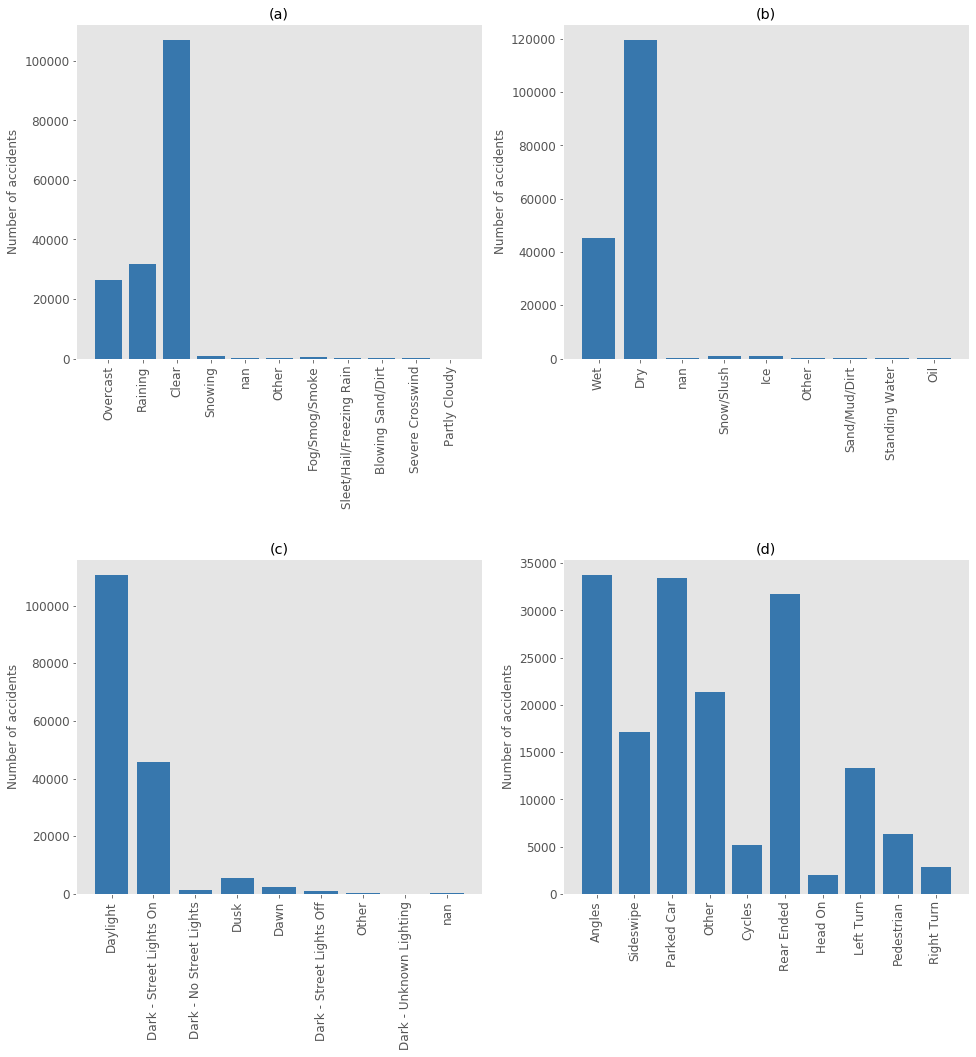

In [94]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Weather conditions
plt.subplot(2,2,1)
freqs = Counter(data_df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road conditions
plt.subplot(2,2,2)
freqs = Counter(data_df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#3 - Light conditions
plt.subplot(2,2,3)
freqs = Counter(data_df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#4 - ADDRTYPE
plt.subplot(2,2,4)
freqs = Counter(data_df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)

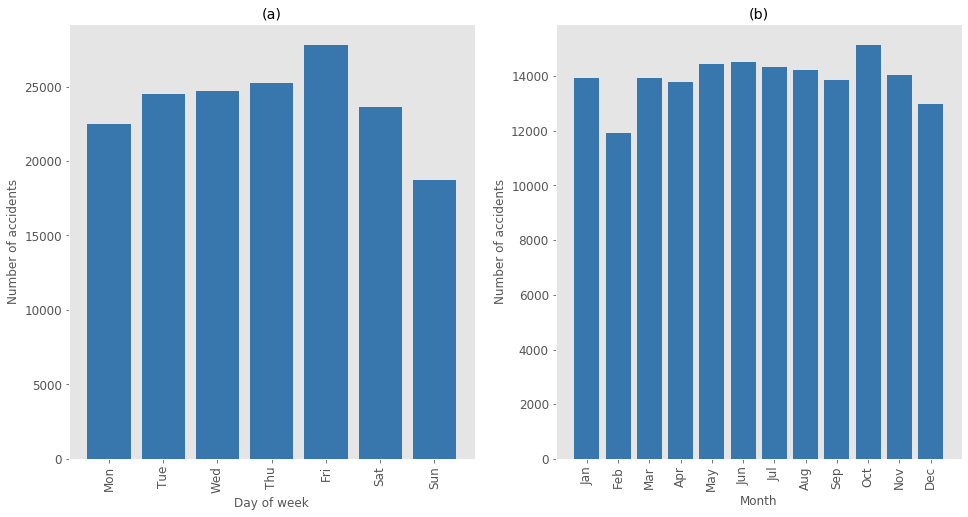

In [95]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,8)

#1 - Day of week in which accident happens
plt.subplot(1,2,1)
freqs = Counter(data_df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(a)')
plt.xlabel("Day of week")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#3777AD')
plt.xticks(xvals, daynames, rotation='vertical')

#2 - Month of year in which accident happens
plt.subplot(1,2,2)
freqs = Counter(data_df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(b)')
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#3777AD')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)

## Pre-Processing: Feature extraction

We now enter the final phase of data preparation -- deciding which of the remaining columns from the dataframe to include in our model building. Let's begin by looking at a correlation matrix for the dataset:

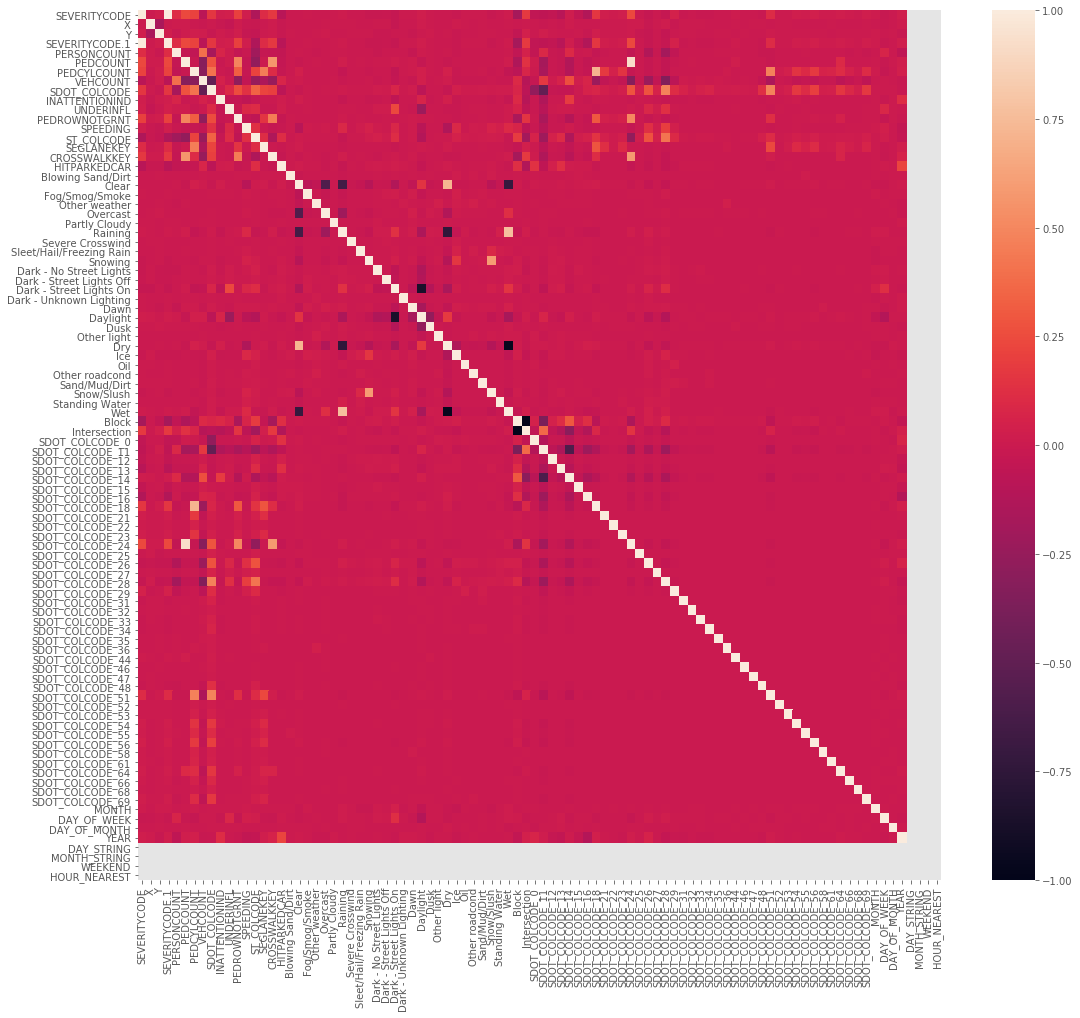

In [46]:
if "Alley" in data:
    del data["Alley"]

plt.rcParams["figure.figsize"] = (18,16)
corr = data.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Little is hugely surprising in here: there seem to be only weak/marginal correlations between _SEVERITYCODE_  and weather/light conditions, however there are is also an interesting correlation between _PEDROWNOTGRT_ and "Dark - Street Lights On". Presumably this is because in low light conditions drivers often don't see pedestrians? 

It looks as if there is a correlation between _SEVERITYCODE_ and _ST\_COLCODE_ , which makes sense as we would expect different types of collision to have more serious consequences, e.g. a head-on collision on a motorway is likely to have more deaths/serious injuries than a low-speed read-end collision.

There are clear correlations between _SEVERITYCODE_ and _INJURIES_ , _SERIOUSINJURIES_ and _FATALITIES_ but these should surprise no-one as a combination of the latter three features **defines** _SEVERITYCODE_ . The purpose of the model is to predict the _SEVERITYCODE_ of an accident based on the environmental/geographical conditions. There is little point building a model that tells us "count the injuries, and if there are a lot then the accident is serious!". We will have to consider excluding these features from the dataset.

Deciding whether to keep or remove other features is a bit more subjective, however it is helpful to think of this from the point of view of an emergency services operator: an accident has occurred, and you wish to be able to make a quick prediction as to its severity. What key features might you expect to be able to know about _before_ the first responders arrive at the scene in order to be able to influence who you send? Clearly you cannot know the number of fatalities in advance, but might the person reporting the accident be able to provide some useful information to help you predict the severity of the accident? It seems logical that the time, day, date, weather and road conditions would be known at the time of the accident. It is also likely that the person reporting the accident would be able to tell you if there were pedestrians/cyclists involved, and how many cars. They may also be able to tell you if alcohol is obviously a factor, if the accident took place on a pedestrian crossing/crosswalk, whether the accident involved a parked car and to provide a brief description of the nature of the collision (which is encoded in _SDOT\_COLCODE_ ). We should therefore keep these features.

As a reminder, the target variable is _SEVERITYCODE_ , so clearly this cannot be part of the feature set.

## Balancing the dataset

As is clear from the histogram of severity code shown above (and repeated below, using a linearly-scaled y axis), the vast majority of accidents involve either no injuries, or minor injuries only. Only a small number of accidents involve serious injuries or fatalities. If we train a classification model on these data, the model will be biased. To fix this issue we need to resample the data. 

I propose to rebalance the data by:

1. Down-sampling _SEVERITYCODE_ 1, 2 and 3 (no, minor and major injuries, respectively) to match the number of samples as is in _SEVERITYCODE_ 4 (fatalities)
2. Converting _SEVERITYCODE_ in to a binary variable with 0 for no/minor injuries and 1 for major injuries/fatalities.


In addition to balancing the dataset between the four values that can be taken by the target variable (_SEVERITYCODE_ ) this will also drastically reduce overall size of the dataset, making it much more feasible for us to build and test our models. 

In [47]:
data

,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,DAY_STRING,MONTH_STRING,WEEKEND,HOUR_NEAREST
0,2,-122.323148,47.703140,2,2,0,0,2,11,0,...,0,2013-03-27 14:54:00,3,2,27,2013,0,0,0,0
1,1,-122.347294,47.647172,1,2,0,0,2,16,0,...,0,2006-12-20 18:55:00,12,2,20,2006,0,0,0,0
2,1,-122.334540,47.607871,1,4,0,0,3,14,0,...,0,2004-11-18 10:20:00,11,3,18,2004,0,0,0,0
3,1,-122.334803,47.604803,1,3,0,0,3,11,0,...,0,2013-03-29 09:26:00,3,4,29,2013,0,0,0,0
4,2,-122.306426,47.545739,2,2,0,0,2,11,0,...,0,2004-01-28 08:04:00,1,2,28,2004,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167049,2,-122.290826,47.565408,2,3,0,0,2,11,0,...,0,2018-11-12 08:12:00,11,0,12,2018,0,0,0,0
167050,1,-122.344526,47.690924,1,2,0,0,2,14,1,...,0,2018-12-18 09:14:00,12,1,18,2018,0,0,0,0
167051,2,-122.306689,47.683047,2,3,0,0,2,11,0,...,0,2019-01-19 09:25:00,1,5,19,2019,0,0,0,0
167052,2,-122.355317,47.678734,2,2,0,1,1,51,0,...,0,2019-01-15 16:48:00,1,1,15,2019,0,0,0,0


In [48]:
#from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [49]:
#Re-sample the dataset
shuffled_data = data.sample(frac=1, random_state=4)

In [50]:
#Create separate dataframes for each of the values of SEVERITYCODE
code_1 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1]
code_2 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 2]

#Down-sample severity codes 1, 2 to match number of accidents in code 3
code_1_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1].sample(n=len(code_2), random_state=42)
code_2_resample = code_2

#Merge the dataframes
resampled_df = pd.concat([code_1_resample, code_2_resample])

#Now find out which of the resampled columns have no variation left in them 
#(e.g. rare weather conditions which are all "0" due to one-hot encoding and 
#re-sampling)
badcols = resampled_df.columns[resampled_df.nunique() <= 1]

#Remove these from DF
for badcol in badcols:
    if badcol in resampled_df:
        del resampled_df[badcol]
        
print(resampled_df.shape)

resampled_df.head(5)

(109902, 93)


,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR
153459,1,-122.325969,47.590310,1,4,0,0,2,14,0,...,0,0,0,0,0,2019-04-03 08:00:00,4,2,3,2019
34256,1,-122.329643,47.601718,1,2,0,0,2,11,0,...,0,0,0,0,0,2006-07-20 16:50:00,7,3,20,2006
158060,1,-122.317887,47.710770,1,2,0,0,2,13,0,...,0,0,0,0,0,2018-08-27 17:24:00,8,0,27,2018
95994,1,-122.317430,47.612916,1,2,0,0,2,13,0,...,0,0,0,0,0,2012-01-12 22:35:00,1,3,12,2012
69561,1,-122.313926,47.599015,1,3,0,0,2,14,0,...,0,0,0,0,0,2009-06-29 14:46:00,6,0,29,2009


In [51]:
for column in resampled_df.columns:
    print(column)

SEVERITYCODE
X
Y
SEVERITYCODE.1
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
SDOT_COLCODE
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SPEEDING
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR
Blowing Sand/Dirt
Clear
Fog/Smog/Smoke
Other weather
Overcast
Partly Cloudy
Raining
Severe Crosswind
Sleet/Hail/Freezing Rain
Snowing
Dark - No Street Lights
Dark - Street Lights Off
Dark - Street Lights On
Dark - Unknown Lighting
Dawn
Daylight
Dusk
Other light
Dry
Ice
Oil
Other roadcond
Sand/Mud/Dirt
Snow/Slush
Standing Water
Wet
Block
Intersection
SDOT_COLCODE_0
SDOT_COLCODE_11
SDOT_COLCODE_12
SDOT_COLCODE_13
SDOT_COLCODE_14
SDOT_COLCODE_15
SDOT_COLCODE_16
SDOT_COLCODE_18
SDOT_COLCODE_21
SDOT_COLCODE_22
SDOT_COLCODE_23
SDOT_COLCODE_24
SDOT_COLCODE_25
SDOT_COLCODE_26
SDOT_COLCODE_27
SDOT_COLCODE_28
SDOT_COLCODE_29
SDOT_COLCODE_31
SDOT_COLCODE_32
SDOT_COLCODE_33
SDOT_COLCODE_34
SDOT_COLCODE_35
SDOT_COLCODE_36
SDOT_COLCODE_44
SDOT_COLCODE_46
SDOT_COLCODE_47
SDOT_COLCODE

([<matplotlib.axis.XTick at 0x2766f5a0128>,
 <a list of 2 Text xticklabel objects>)

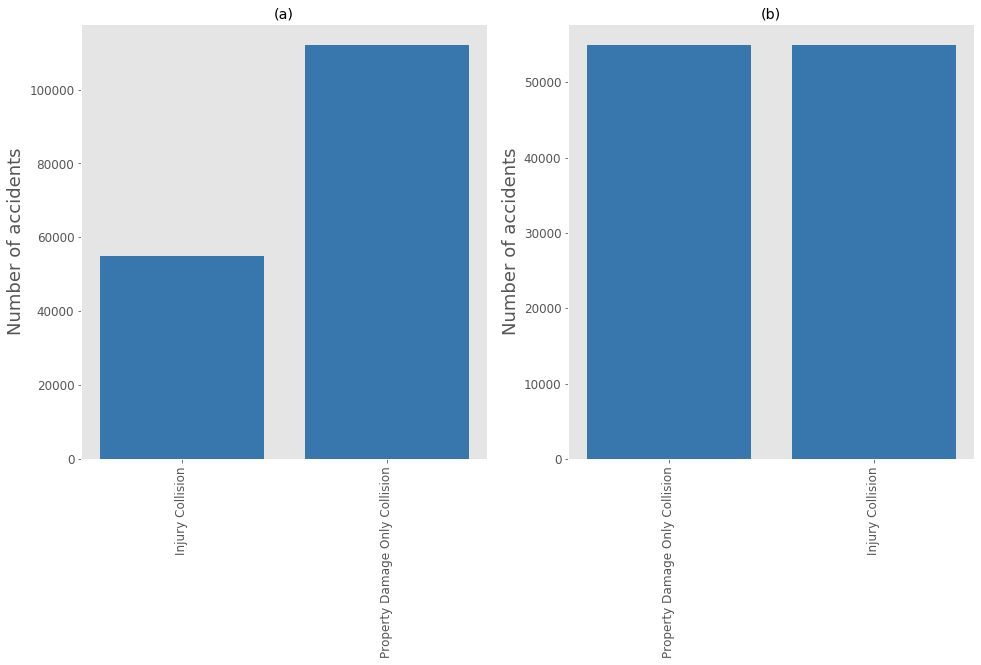

In [96]:
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

#Accident outcomes before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Accident severities (original)
plt.subplot(1,2,1)
freqs = Counter(data_df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Accident severities (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["SEVERITYCODE"])
xvals = range(len(freqs.values()))
labels = ['Property Damage Only Collision', 'Injury Collision', 'Serious Injury Collision', 'Fatality Collision']
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, labels, rotation='vertical')

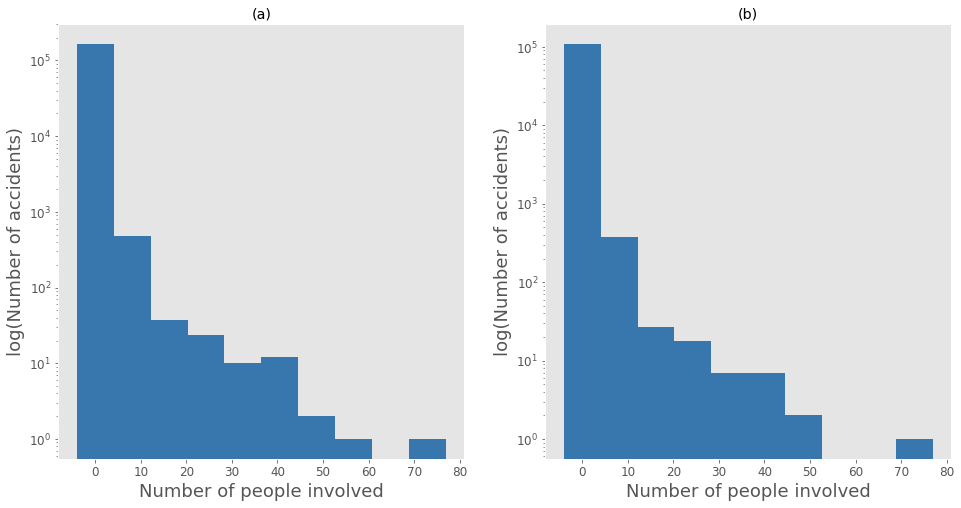

In [97]:
#People involved before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - People involved (original)
plt.subplot(1,2,1)
freqs = Counter(data_df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of people involved", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(data_df["PERSONCOUNT"], align='left', color='#3777AD')
plt.yscale('log')

#2 - People involved (re-sampled)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(resampled_df["PERSONCOUNT"], align='left', color='#3777AD')
plt.yscale('log')

([<matplotlib.axis.XTick at 0x27669a63e48>,
 <a list of 11 Text xticklabel objects>)

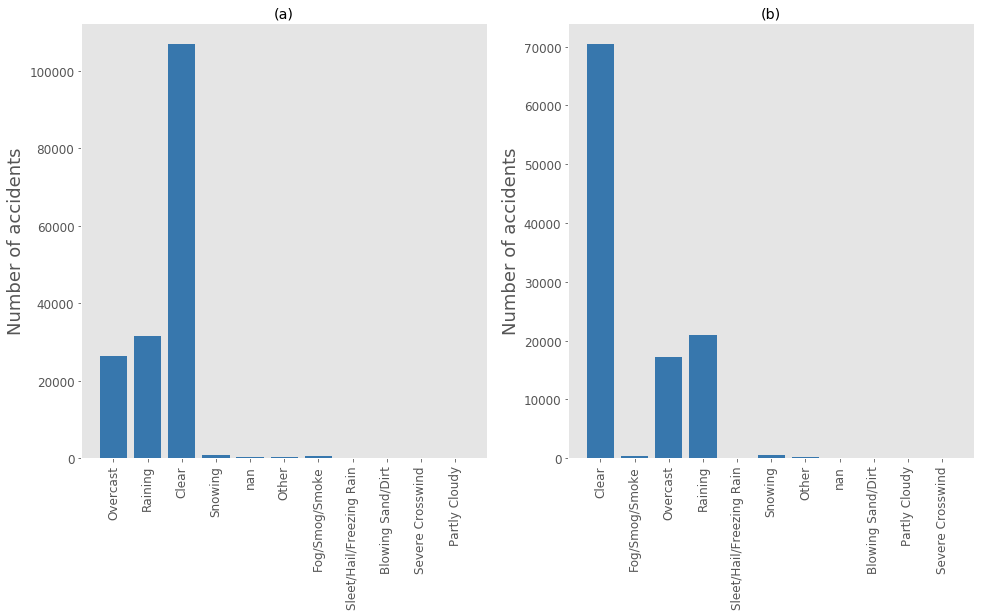

In [98]:
#Weather before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Weather (original)
plt.subplot(1,2,1)
freqs = Counter(data_df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Weather (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')


([<matplotlib.axis.XTick at 0x2766d032b00>,
 <a list of 9 Text xticklabel objects>)

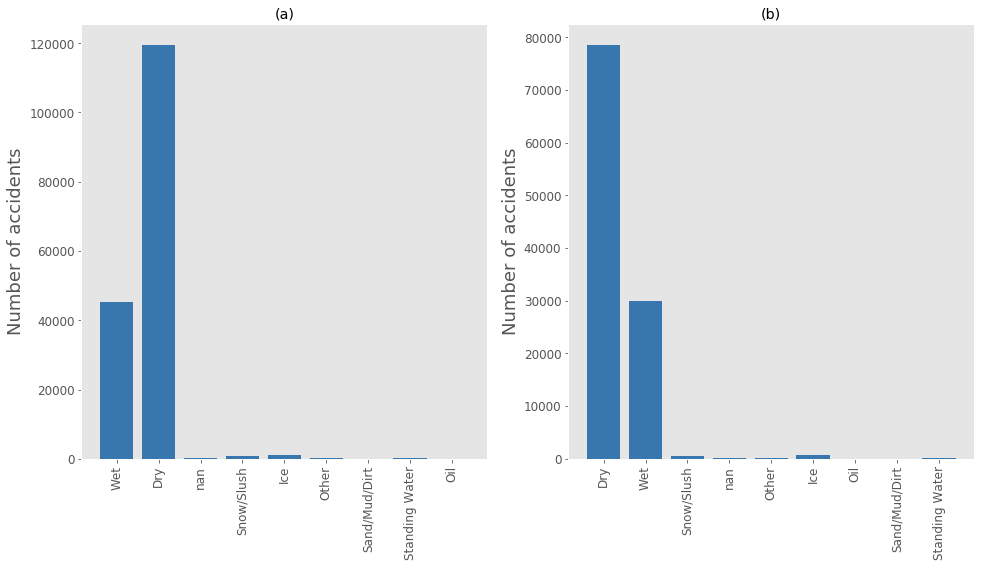

In [99]:
#Roadcond before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Road Conditions (original)
plt.subplot(1,2,1)
freqs = Counter(data_df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road Conditions (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

([<matplotlib.axis.XTick at 0x2766d34a278>,
 <a list of 9 Text xticklabel objects>)

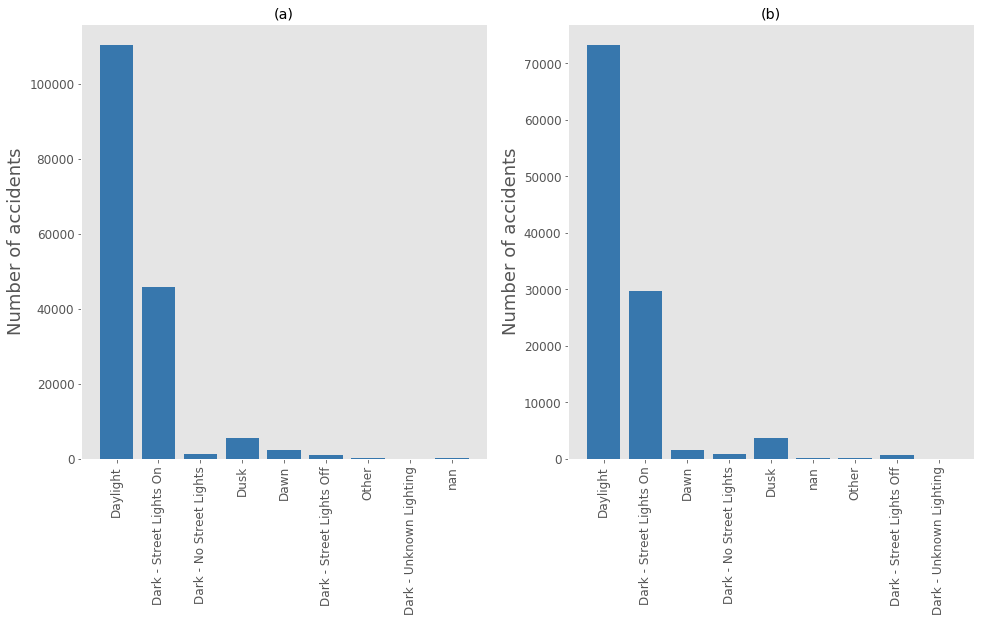

In [100]:
#Light before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Light Conditions (original)
plt.subplot(1,2,1)
freqs = Counter(data_df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Light Conditions (normalised)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#3777AD')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

([<matplotlib.axis.XTick at 0x2766f506a58>,
 <a list of 7 Text xticklabel objects>)

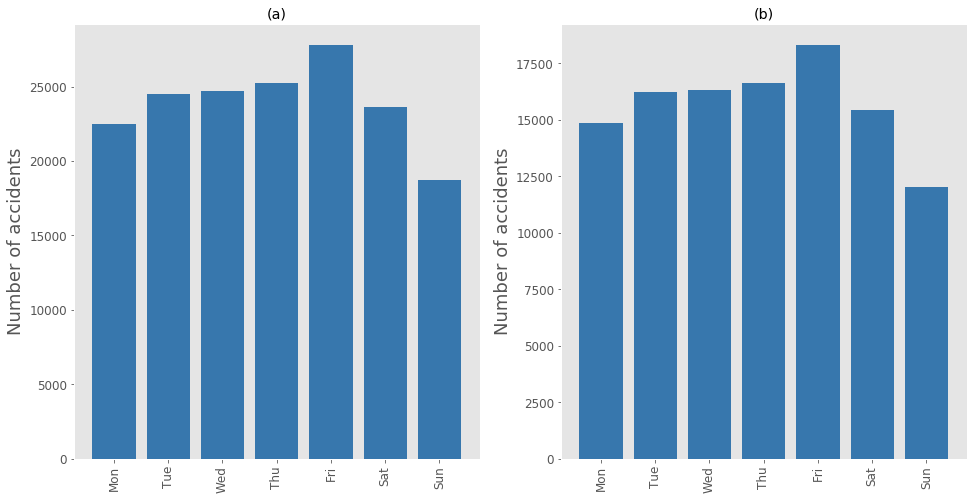

In [101]:
#Day of week (Before/After)
plt.rcParams["figure.figsize"] = (16,8)

#1 - Day of week (before)
plt.subplot(1,2,1)
freqs = Counter(data_df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(a)')
#plt.xlabel("Day of week", size=18)
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#3777AD')
plt.xticks(xvals, daynames, rotation='vertical')

#2 - Day of week (after)
plt.subplot(1,2,2)
freqs = Counter(resampled_df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(b)')
#plt.xlabel("Day of week", size=18)
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#3777AD')
plt.xticks(xvals, daynames, rotation='vertical')

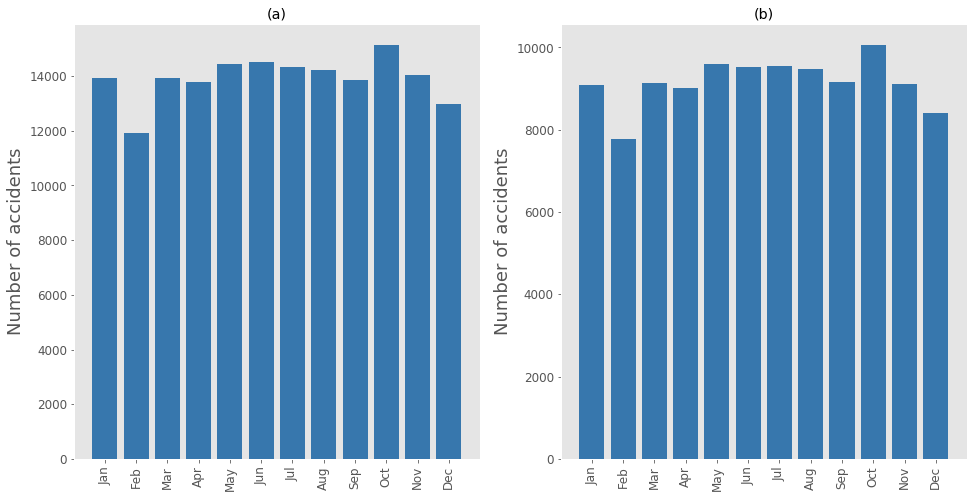

In [102]:
#Month of year (Before/After)
plt.rcParams["figure.figsize"] = (16,8)

#1 - Month of year in which accident happens
plt.subplot(1,2,1)
freqs = Counter(data_df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(a)')
#plt.xlabel("Month")
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#3777AD')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)

#1 - Month of year in which accident happens
plt.subplot(1,2,2)
freqs = Counter(resampled_df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(b)')
#plt.xlabel("Month")
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='#3777AD')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)

In [103]:
resampled_df.head(5)

,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
153459,1,-122.325969,47.590310,1,4,0,0,2,14,0,...,0,0,2019-04-03 08:00:00,4,2,3,2019,1,0,5
34256,1,-122.329643,47.601718,1,2,0,0,2,11,0,...,0,0,2006-07-20 16:50:00,7,3,20,2006,1,0,5
158060,1,-122.317887,47.710770,1,2,0,0,2,13,0,...,0,0,2018-08-27 17:24:00,8,0,27,2018,2,0,5
95994,1,-122.317430,47.612916,1,2,0,0,2,13,0,...,0,0,2012-01-12 22:35:00,1,3,12,2012,1,0,2
69561,1,-122.313926,47.599015,1,3,0,0,2,14,0,...,0,0,2009-06-29 14:46:00,6,0,29,2009,1,0,5


In [60]:
resampled_df.shape

(109902, 93)

In [61]:
resampled_df.dtypes

SEVERITYCODE               int64
X                        float64
Y                        float64
SEVERITYCODE.1             int64
PERSONCOUNT                int64
                       ...      
INC_DATE_TIME     datetime64[ns]
MONTH                      int64
DAY_OF_WEEK                int64
DAY_OF_MONTH               int64
YEAR                       int64
Length: 93, dtype: object

In [62]:
#List the features that are remaining in resample_df
print("Column names:")
for (columnName, columnData) in resampled_df.iteritems():
    print(columnName)

Column names:
SEVERITYCODE
X
Y
SEVERITYCODE.1
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
SDOT_COLCODE
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SPEEDING
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR
Blowing Sand/Dirt
Clear
Fog/Smog/Smoke
Other weather
Overcast
Partly Cloudy
Raining
Severe Crosswind
Sleet/Hail/Freezing Rain
Snowing
Dark - No Street Lights
Dark - Street Lights Off
Dark - Street Lights On
Dark - Unknown Lighting
Dawn
Daylight
Dusk
Other light
Dry
Ice
Oil
Other roadcond
Sand/Mud/Dirt
Snow/Slush
Standing Water
Wet
Block
Intersection
SDOT_COLCODE_0
SDOT_COLCODE_11
SDOT_COLCODE_12
SDOT_COLCODE_13
SDOT_COLCODE_14
SDOT_COLCODE_15
SDOT_COLCODE_16
SDOT_COLCODE_18
SDOT_COLCODE_21
SDOT_COLCODE_22
SDOT_COLCODE_23
SDOT_COLCODE_24
SDOT_COLCODE_25
SDOT_COLCODE_26
SDOT_COLCODE_27
SDOT_COLCODE_28
SDOT_COLCODE_29
SDOT_COLCODE_31
SDOT_COLCODE_32
SDOT_COLCODE_33
SDOT_COLCODE_34
SDOT_COLCODE_35
SDOT_COLCODE_36
SDOT_COLCODE_44
SDOT_COLCODE_46
SDOT_COLCODE_4

In [63]:
resampled_df["WEATHER"] = resampled_df["WEATHER"].astype('category')
resampled_df["ROADCOND"] = resampled_df["ROADCOND"].astype('category')
resampled_df["LIGHTCOND"] = resampled_df["LIGHTCOND"].astype('category')

# Assign variable to new column for analysis
resampled_df["WEATHER_CAT"] = resampled_df["WEATHER"].cat.codes
resampled_df["ROADCOND_CAT"] = resampled_df["ROADCOND"].cat.codes
resampled_df["LIGHTCOND_CAT"] = resampled_df["LIGHTCOND"].cat.codes

resampled_df.head(5)

,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,...,SDOT_COLCODE_68,SDOT_COLCODE_69,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
153459,1,-122.325969,47.590310,1,4,0,0,2,14,0,...,0,0,2019-04-03 08:00:00,4,2,3,2019,1,0,5
34256,1,-122.329643,47.601718,1,2,0,0,2,11,0,...,0,0,2006-07-20 16:50:00,7,3,20,2006,1,0,5
158060,1,-122.317887,47.710770,1,2,0,0,2,13,0,...,0,0,2018-08-27 17:24:00,8,0,27,2018,2,0,5
95994,1,-122.317430,47.612916,1,2,0,0,2,13,0,...,0,0,2012-01-12 22:35:00,1,3,12,2012,1,0,2
69561,1,-122.313926,47.599015,1,3,0,0,2,14,0,...,0,0,2009-06-29 14:46:00,6,0,29,2009,1,0,5


## Normalise the data

In [68]:
import numpy as np
X = np.asarray(resampled_df[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[1, 0, 5],
       [1, 0, 5],
       [2, 0, 5],
       [1, 0, 2],
       [1, 0, 5]], dtype=int8)

In [70]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.7042462 , -0.62146666,  0.59522168],
       [-0.7042462 , -0.62146666,  0.59522168],
       [-0.22518216, -0.62146666,  0.59522168],
       [-0.7042462 , -0.62146666, -1.48807001],
       [-0.7042462 , -0.62146666,  0.59522168]])

In [73]:
Y = np.asarray(resampled_df['SEVERITYCODE'])
Y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Split in to testing/training subsets

In [74]:
# We split X and Y into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (76931, 3) (76931,)
Test set: (32971, 3) (32971,)


# Classification

We now finally have a clean, balanced and standardised dataset for the Seattle area. Categorical variables have been converted to numerical variables using standard data processing techniques. We are finally ready to begin building and testing models for predicting _SEVERITYCODE_ from our chosen feature set. 

The four models which will be built, tested and compared are:

1. k-Nearest Neighbours (kNN)
2. Decision Tree
3. Logistic Regression

### K-Nearest Neighbors (KNN)

In [152]:
# Building the KNN Model
from sklearn.neighbors import KNeighborsClassifier

k = 25

In [153]:
#Train Model & Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Decision Tree

In [171]:
# Building the Decision Tree
from sklearn.tree import DecisionTreeClassifier
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
colDataTree
colDataTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [172]:
# Train Model & Predict
DTyhat = colDataTree.predict(X_test)

### Logistic Regression

In [159]:
# Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
# Train Model & Predicr
LRyhat = LR.predict(X_test)
LRyhat

array([2, 1, 2, ..., 1, 1, 1], dtype=int64)

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.4937124 , 0.5062876 ],
       [0.51957358, 0.48042642],
       [0.4937124 , 0.5062876 ],
       ...,
       [0.53497271, 0.46502729],
       [0.53497271, 0.46502729],
       [0.53497271, 0.46502729]])

## Results & Evaluation

Now we will check the accuracy of our models.

In [162]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### K-Nearest Neighbor

In [163]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, Kyhat)

C:\Users\JAY\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.49124988626368626

In [164]:
# F1-SCORE
f1_score(Y_test, Kyhat, average='macro')

0.47619870634644745

<i>Model is most accurate when k is 25.</i>

In [173]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, DTyhat)

C:\Users\JAY\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5183039640896545

In [174]:
# F1-SCORE
f1_score(Y_test, DTyhat, average='macro')

0.48114954074540683

In [149]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, LRyhat)

0.5184556125079616

In [150]:
# F1-SCORE
f1_score(Y_test, LRyhat, average='macro')

0.4958071766854718

In [151]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(Y_test, yhat_prob)

0.6921950516353936

## Discussion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algorithm, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 109902 values each.

Onace we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made the most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyperamater C values helped to improve our accuracy to be the best possible.

## Conclusion

__Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).__